In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
df_final = pd.read_csv('df_final.csv')

In [3]:
df = df_final.drop('commande',axis=1)

In [4]:
df.shape

(5270, 72)

In [5]:
df.describe()

,agrumes,ail,assortiment,aubergine,autre,betterave,beurre,blette,breuil,carotte,...,savon,soupe,tisane,tomate,tomme de vache fraîche,viande de chèvre ou chevreau,viande de porc,viande de veau,vin ou cidre,yaourt
count,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,...,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000
mean,0.310247,0.051044,0.020683,0.035674,0.000380,0.049905,0.360152,0.066414,0.096584,0.092979,...,0.038330,0.012144,0.026186,0.107780,0.010816,0.272296,0.196964,0.042884,0.061101,1.060721
std,0.747457,0.220108,0.142335,0.185493,0.019479,0.217770,0.536472,0.249027,0.295419,0.290431,...,0.209952,0.109540,0.188080,0.310132,0.103446,0.583225,0.616646,0.260774,0.285117,1.246028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,5.000000,1.000000,1.000000,5.000000,6.000000,4.000000,4.000000,7.000000


## Kmeans

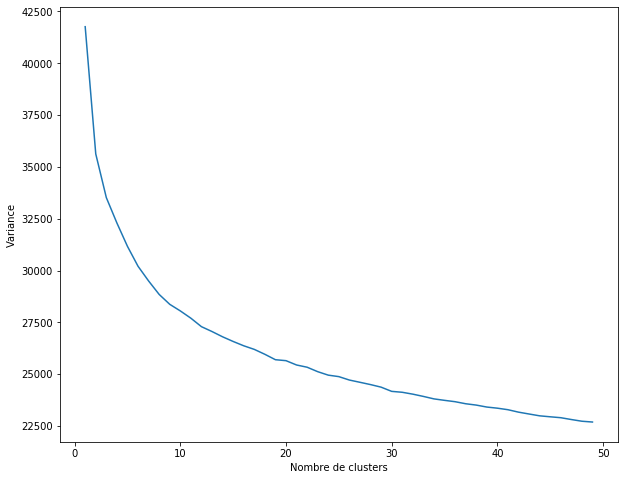

CPU times: user 1min 56s, sys: 8.63 s, total: 2min 4s
Wall time: 1min 9s


In [6]:
%%time
# Sur données non standardisées (df)
# On essaie de trouver le nombre de cluster approprié
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
variance = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    variance.append(kmeans.inertia_)
plt.plot(range(1, 50), variance)
plt.xlabel('Nombre de clusters')
plt.ylabel('Variance')
plt.show()

In [7]:
# Graphiquement on constate qu'autour de 15 clusters la courbe à tendance à s'aplatir

In [8]:
# On découpe notre df en 15 classes
kmeans = KMeans(n_clusters=15)
kmeans.fit(df)
classes = kmeans.predict(df)

In [9]:
test = df.loc[5265,:].values
test =np.reshape(test,(1,-1))
classe_test = kmeans.predict(test)
print("La classe est :",classe_test[0])

La classe est : 6


In [10]:
# On ajoute la colonne classe au dataframe avec les résultats obtenus
df_final['classe'] = classes

In [11]:
# Pour la lisibilité on met la colonne 'classe' au début de dataframe
cols = df_final.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_final = df_final[cols]
df_final

,classe,commande,agrumes,ail,assortiment,aubergine,autre,betterave,beurre,blette,...,savon,soupe,tisane,tomate,tomme de vache fraîche,viande de chèvre ou chevreau,viande de porc,viande de veau,vin ou cidre,yaourt
0,11,1743,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,14,1750,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,1751,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1752,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
4,5,1753,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,6,7201,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5266,11,7202,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5267,11,7203,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5268,3,7204,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,2


In [12]:
df_final.describe()

,classe,commande,agrumes,ail,assortiment,aubergine,autre,betterave,beurre,blette,...,savon,soupe,tisane,tomate,tomme de vache fraîche,viande de chèvre ou chevreau,viande de porc,viande de veau,vin ou cidre,yaourt
count,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,...,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000
mean,7.233397,4474.715560,0.310247,0.051044,0.020683,0.035674,0.000380,0.049905,0.360152,0.066414,...,0.038330,0.012144,0.026186,0.107780,0.010816,0.272296,0.196964,0.042884,0.061101,1.060721
std,3.979663,1583.315004,0.747457,0.220108,0.142335,0.185493,0.019479,0.217770,0.536472,0.249027,...,0.209952,0.109540,0.188080,0.310132,0.103446,0.583225,0.616646,0.260774,0.285117,1.246028
min,0.000000,1743.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3100.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4460.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,5853.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,14.000000,7205.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,5.000000,1.000000,1.000000,5.000000,6.000000,4.000000,4.000000,7.000000


In [13]:
sum_column = df_final[df_final.classe == 2].sum(axis=0)

In [14]:
sum_column[:2]

classe         230
commande    709189
dtype: int64

In [15]:
liste = sum_column.sort_values(ascending=False)[2:22].index

In [16]:
type(liste)

pandas.core.indexes.base.Index

In [17]:
liste_top_classe = []
for i in range(15):
    sum_column = df_final[df_final.classe == i].sum(axis=0)
    #On supprime les deux premiers éléments qui sont le numero de commande et la classe
    sum_column = sum_column[2:]
    # Puis on classe les articles par fréquence
    liste = sum_column.sort_values(ascending=False)[2:22].index
    liste_top_classe.append(liste)

In [18]:
cols = [i for i in range(1,21)]
df_export = pd.DataFrame(np.array(liste_top_classe),
                   columns=cols)

In [19]:
df_export

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,oeufs,beurre,fromage blanc,lait,fromage de chèvre,jus ou sirop,viande de porc,fromage de brebis fermier,creme fraiche,poireaux,oignon,salade,farine,vin ou cidre,confiture,miel,ail,pomme de terre,chou,breuil
1,fromage blanc,beurre,jus ou sirop,fromage de chèvre,salade,creme fraiche,oeufs,oignon,fromage de brebis fermier,agrumes,mamia,poireaux,viande de porc,courge,farine,breuil,miel,viande de chèvre ou chevreau,pomme de terre,piment
2,fromage blanc,fromage de chèvre,oeufs,beurre,viande de chèvre ou chevreau,poireaux,viande de porc,creme fraiche,miel,fromage de brebis fermier,confiture,mamia,carotte,jus ou sirop,vin ou cidre,pomme de terre,courge,piment,salade,farine
3,beurre,lait,salade,agrumes,oeufs,chou,viande de chèvre ou chevreau,fromage de brebis fermier,jus ou sirop,fromage de chèvre,fromage blanc,pomme de terre,poulet,creme fraiche,poireaux,miel,confiture,oignon,mamia,kiwi
4,fromage de chèvre,lait,fromage blanc,creme fraiche,salade,jus ou sirop,oignon,viande de chèvre ou chevreau,fromage de brebis fermier,pomme de terre,poireaux,oeufs,courge,pommes,confiture,viande de porc,piment,chou,tomate,agrumes
5,pomme de terre,yaourt,pommes,poireaux,beurre,courge,epinard,jus ou sirop,lait,fromage blanc,fromage de chèvre,creme fraiche,fromage de brebis fermier,breuil,oignon,poulet,celeri,miel,agrumes,viande de chèvre ou chevreau
6,fromage de chèvre,lait,fromage blanc,salade,creme fraiche,jus ou sirop,agrumes,pomme de terre,viande de chèvre ou chevreau,oeufs,fromage de brebis fermier,poireaux,courge,oignon,chou,breuil,pommes,tomate,confiture,blette
7,beurre,salade,lait,poireaux,viande de chèvre ou chevreau,pommes,carotte,fromage blanc,chou,pomme de terre,creme fraiche,kiwi,epinard,jus ou sirop,oeufs,oignon,courge,persil,poulet,fromage de chèvre
8,salade,beurre,lait,fromage blanc,courge,viande de chèvre ou chevreau,pomme de terre,jus ou sirop,creme fraiche,viande de porc,oignon,piment,tomate,oeufs,confiture,poireaux,miel,mamia,pommes,breuil
9,salade,oeufs,fromage de chèvre,lait,fromage de brebis fermier,jus ou sirop,oignon,fromage blanc,poireaux,agrumes,ail,viande de porc,confiture,pommes,miel,vin ou cidre,poulet,creme fraiche,mamia,breuil


In [20]:
# Export du modele et du dataframe final pour utilisation en dehors du notebook

# Modèle
pickle.dump(kmeans, open('kmeans_model.sav', 'wb'))

# Data
df_export.to_csv('df_export.csv', index=False)